In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data loading

In [2]:
train = pd.read_pickle("./data/train.pkl")
test = pd.read_pickle("./data/test.pkl")


train_DL = pd.read_pickle("./data/train_DL.pkl")
test_DL = pd.read_pickle("./data/test_DL.pkl")
val_DL = pd.read_pickle("./data/validate_DL.pkl")

In [3]:
def load_data(train, test):
    train_X = np.array(train.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    train_Y = np.array(train.pIC50)
    test_X = np.array(test.loc[:,~test.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    test_Y = np.array(test.pIC50)

    return train_X, train_Y, test_X, test_Y

def load_data_DL(train_DL, test_DL, val_DL):
    train_X = np.array(train_DL.loc[:,~train_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    train_Y = np.array(train_DL.pIC50)
    test_X = np.array(test_DL.loc[:,~test_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    test_Y = np.array(test_DL.pIC50)
    val_X = np.array(val_DL.loc[:,~val_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    val_Y = np.array(val_DL.pIC50)

    return train_X, train_Y, test_X, test_Y, val_X, val_Y

In [4]:
def root_mean_squared_error(test_y, pred_y):
    return np.sqrt(mean_squared_error(test_y, pred_y))

In [5]:
def evaluate(train_Y, pred_Y_train, test_Y, pred_Y_test):
    print("Train Root Mean Squared Error:", root_mean_squared_error(train_Y, pred_Y_train))
    print("Train Mean Absolute Error:", mean_absolute_error(train_Y, pred_Y_train))
    print("Train R2:", r2_score(train_Y, pred_Y_train))
    print('\n')
    print("Test Root Mean Squared Error:", mean_squared_error(test_Y, pred_Y_test))
    print("Test Mean Absolute Error:", mean_absolute_error(test_Y, pred_Y_test))
    print("Test R2:", r2_score(test_Y, pred_Y_test))
    print('\n')

In [6]:
def visualizeTrainTest(train_Y, pred_Y_train, test_Y, pred_Y_test):
    fig, axs = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(10)

    pred_pairs_train = {key: value for key, value in zip(train_Y, pred_Y_train)}
    # pred_pairs_train = dict(sorted(pred_pairs_train.items()))
    pred_pairs_test = {key: value for key, value in zip(test_Y, pred_Y_test)}
    # pred_pairs_test = dict(sorted(pred_pairs_test.items()))


    axs[0].set_title("Train predictions")
    axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
    axs[0].plot(pred_pairs_train.keys(), color="darkblue", label='predictions')
    axs[0].set_xlabel("Molecules")
    axs[0].set_ylabel("pIC50")
    axs[0].legend()
    axs[0].grid()

    axs[1].set_title("Test predictions")
    axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)
    axs[1].plot(pred_pairs_test.keys(), color="darkblue", label='predictions')
    axs[1].set_xlabel("Molecules")
    axs[1].set_ylabel("pIC50")
    axs[1].legend()
    axs[1].grid()

    fig.tight_layout()
    plt.show()

### Random Forest

Train Root Mean Squared Error: 0.05643081739839587
Train Mean Absolute Error: 0.04309316771909702
Train R2: 0.9271804598421313


Test Root Mean Squared Error: 0.03332890810472897
Test Mean Absolute Error: 0.14456842076139712
Test R2: 0.3257503173173305




C:\Users\afs\AppData\Local\Temp\ipykernel_26460\3623938304.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
C:\Users\afs\AppData\Local\Temp\ipykernel_26460\3623938304.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)


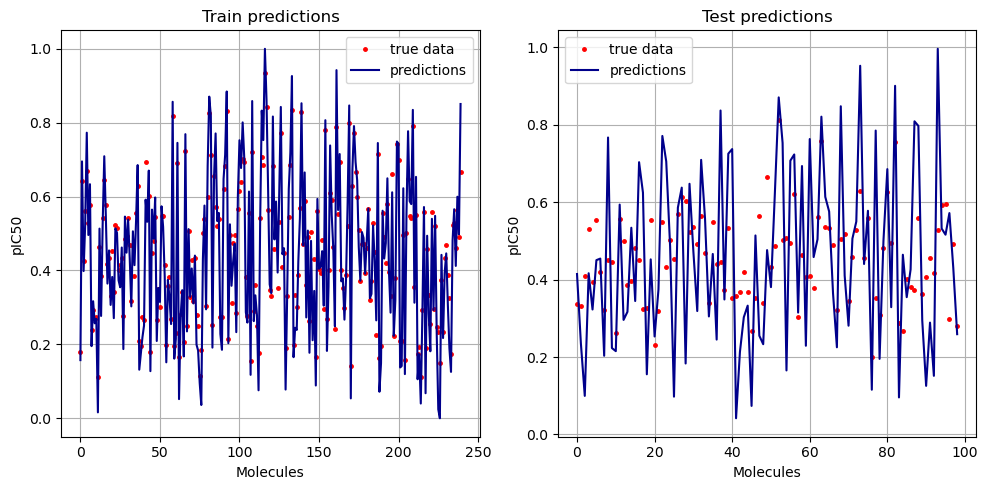

In [7]:
from sklearn.ensemble import RandomForestRegressor

## Fitting

train_X, train_Y, test_X, test_Y,= load_data(train, test)
forest = RandomForestRegressor(random_state=0)
forest.fit(train_X, train_Y)

## Predictions

pred_Y_train_forest = forest.predict(train_X)
pred_Y_test_forest = forest.predict(test_X)
evaluate(train_Y, pred_Y_train_forest, test_Y, pred_Y_test_forest)


## Visualization

visualizeTrainTest(train_Y, pred_Y_train_forest, test_Y, pred_Y_test_forest)


### SVM

Train Root Mean Squared Error: 0.10428464572174266
Train Mean Absolute Error: 0.08672791570899557
Train R2: 0.7513113354627013


Test Root Mean Squared Error: 0.03338377536486698
Test Mean Absolute Error: 0.1455252130164127
Test R2: 0.3246403429784931




C:\Users\afs\AppData\Local\Temp\ipykernel_26460\3623938304.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
C:\Users\afs\AppData\Local\Temp\ipykernel_26460\3623938304.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)


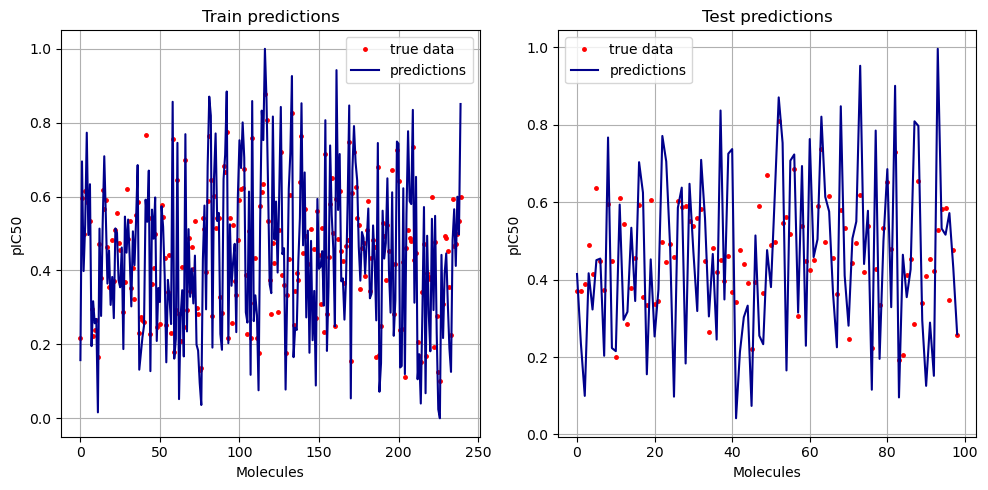

In [8]:
from sklearn.svm import SVR

rain_X, train_Y, test_X, test_Y = load_data(train, test)

## Fitting

svm = SVR()
svm.fit(train_X, train_Y)

## Predictions

pred_Y_train_svm = svm.predict(train_X)
pred_Y_test_svm = svm.predict(test_X)
evaluate(train_Y, pred_Y_train_svm, test_Y, pred_Y_test_svm)

## Visualization

visualizeTrainTest(train_Y, pred_Y_train_svm, test_Y, pred_Y_test_svm)

### DNN

In [9]:
from keras.models import Sequential
from keras.layers import Dense

train_X, train_Y, test_X, test_Y = load_data(train, test)

## Building the model

DNN = Sequential()
DNN.add(Dense(128, kernel_initializer='normal', input_dim = train_X.shape[1], activation='relu'))
DNN.add(Dense(256, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(128, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(1, kernel_initializer='normal',activation='linear'))

## Compiling

DNN.compile(loss='mse', optimizer='adam', metrics=['mse'])
DNN.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               107776    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 173825 (679.00 KB)
Trainable params: 173825 (679.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
from sklearn.model_selection import  KFold
avg_train_loss = []
avg_val_loss = []


N_EPOCHS = 200

for n_epoch in range(N_EPOCHS):
    print('\nEPOCH ', n_epoch+1, '-----------------------------------------------------------------------')
    folds = list(KFold(n_splits=3, shuffle=True, random_state=0).split(train_X, train_Y))
    train_loss = []; train_acc = []
    val_loss = []; val_acc = []

    for j, (train_idx, val_idx) in enumerate(folds):
        print('\nEpoch ', n_epoch, 'Fold ',j)
        X_train_cv = train_X[train_idx]
        y_train_cv = train_Y[train_idx]
        X_valid_cv = train_X[val_idx]
        y_valid_cv = train_Y[val_idx]

        DNN.fit(X_train_cv, y_train_cv, batch_size=64, epochs=1, validation_data=(X_valid_cv, y_valid_cv))
        train_loss.append(DNN.history.history['loss'])
        val_loss.append(DNN.history.history['val_loss'])
    
    avg_train_loss.append(np.average(train_loss))
    avg_val_loss.append(np.average(val_loss))
    print(f'Epoch {n_epoch} - val_loss: {avg_val_loss[-1]}\n')


EPOCH  1 -----------------------------------------------------------------------

Epoch  0 Fold  0


4/4 [==============================] - 1s 51ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.0526 - val_mse: 0.0526

Epoch  0 Fold  1
4/4 [==============================] - 0s 20ms/step - loss: 0.0518 - mse: 0.0518 - val_loss: 0.0417 - val_mse: 0.0417

Epoch  0 Fold  2
4/4 [==============================] - 0s 22ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0399 - val_mse: 0.0399
Epoch 0 - val_loss: 0.04473558937509855


EPOCH  2 -----------------------------------------------------------------------

Epoch  1 Fold  0
4/4 [==============================] - 0s 22ms/step - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0409 - val_mse: 0.0409

Epoch  1 Fold  1
4/4 [==============================] - 0s 21ms/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0308 - val_mse: 0.0308

Epoch  1 Fold  2
4/4 [==============================] - 0s 20ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.

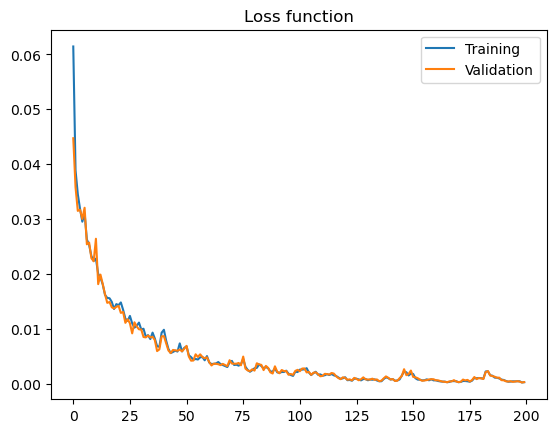

In [11]:
plt.plot(avg_train_loss, label='Training')
plt.plot(avg_val_loss, label='Validation')
plt.title('Loss function')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step
Train Root Mean Squared Error: 0.01787479029642706
Train Mean Absolute Error: 0.0144603201765709
Train R2: 0.9926937057145249


Test Root Mean Squared Error: 0.02998311593480884
Test Mean Absolute Error: 0.1309273013981136
Test R2: 0.3934362823601134




C:\Users\afs\AppData\Local\Temp\ipykernel_26460\3623938304.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
C:\Users\afs\AppData\Local\Temp\ipykernel_26460\3623938304.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)


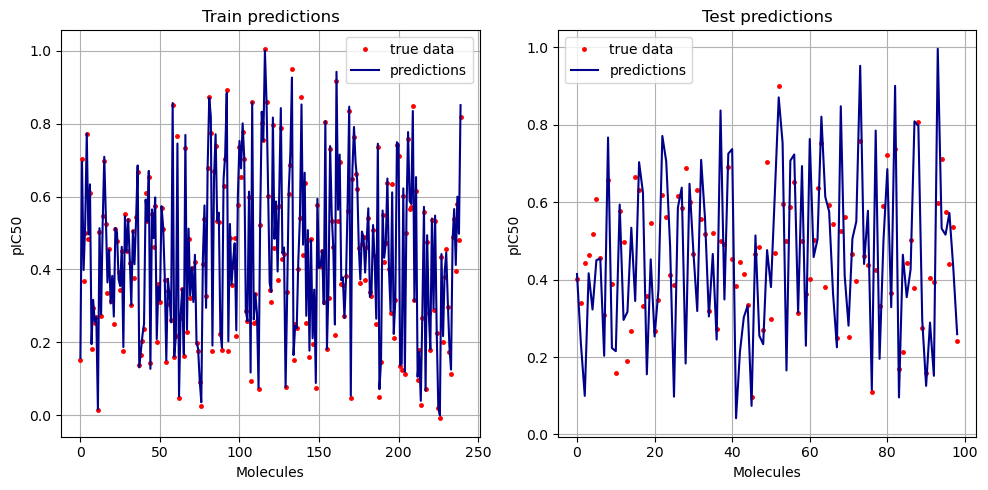

In [12]:
pred_Y_train_dnn = DNN.predict(train_X)
pred_Y_test_dnn = DNN.predict(test_X)
evaluate(train_Y, pred_Y_train_dnn, test_Y, pred_Y_test_dnn)
visualizeTrainTest(train_Y, pred_Y_train_dnn, test_Y, pred_Y_test_dnn)

### ARD

Train Root Mean Squared Error: 0.08506675879454875
Train Mean Absolute Error: 0.06546629763792357
Train R2: 0.8345239973073095


Test Root Mean Squared Error: 0.044185890265367594
Test Mean Absolute Error: 0.17199084672362286
Test R2: 0.10611165547760071




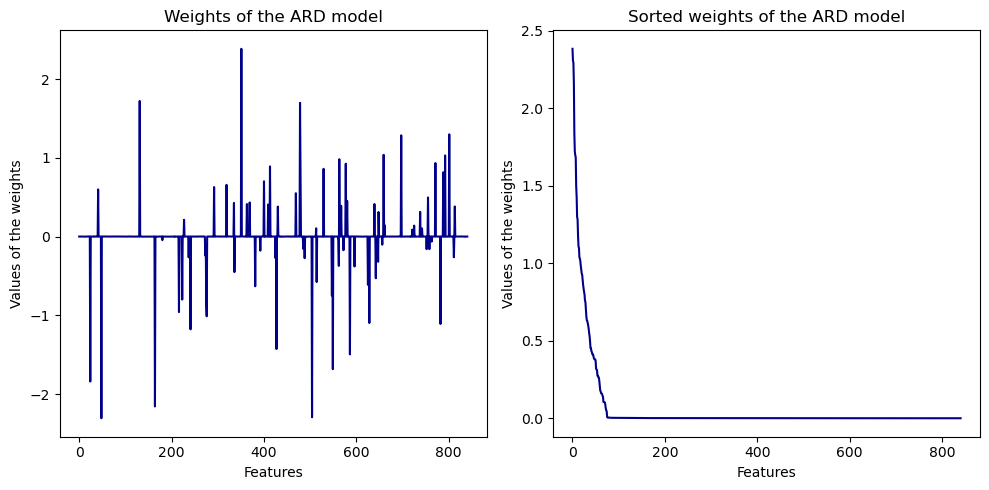

In [13]:
from sklearn import linear_model

train_X, train_Y, test_X, test_Y = load_data(train, test)

ard = linear_model.ARDRegression()
ard.fit(train_X, train_Y)

pred_Y_train_ard = ard.predict(train_X)
pred_Y_test_ard = ard.predict(test_X)
evaluate(train_Y, pred_Y_train_ard, test_Y, pred_Y_test_ard)

fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

axs[0].set_title("Weights of the ARD model")
axs[0].plot(ard.coef_, color="darkblue")
axs[0].set_xlabel("Features")
axs[0].set_ylabel("Values of the weights")

axs[1].set_title("Sorted weights of the ARD model")
axs[1].plot(sorted(np.abs(ard.coef_),reverse=True), color="darkblue")
axs[1].set_xlabel("Features")
axs[1].set_ylabel("Values of the weights")

fig.tight_layout()
plt.show()

Knee at: 75	 Treshold:  0.007207703308641305


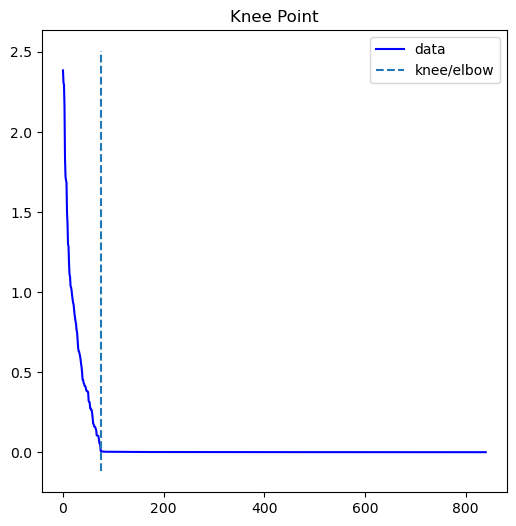

In [14]:
#Simple module to find the knee in a series
from kneed import KneeLocator

kneedle = KneeLocator(list(range(len(ard.coef_))), sorted(np.abs(ard.coef_), reverse=True), S=50, curve='convex', direction='decreasing')
print(f'Knee at: {kneedle.knee}\t Treshold: ',kneedle.knee_y)
kneedle.plot_knee()

In [15]:
mask = abs(ard.coef_) > kneedle.knee_y

cols = np.array(train_DL.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns)[mask]
vals = ard.coef_[mask]
feature_weights = {key: value for key, value in zip(cols, vals)}
sorted_feature_weights = sorted(feature_weights.items(), key=lambda x:abs(x[1]), reverse=True)

print(len(feature_weights))
sorted_feature_weights


75


[('AATSC4p', 2.38465556087597),
 ('ATS6v', -2.3079078335053604),
 ('GATS2p', -2.2957238172688954),
 ('AATS4p', -2.1580759367936455),
 ('ATS0Z', -1.8409996090864424),
 ('AATS3v', 1.7220052303006597),
 ('GATS4v', 1.6977418686145456),
 ('WNSA1', -1.684290204816036),
 ('Xpc-6dv', -1.4967227886991998),
 ('MATS2p', -1.4285065289171892),
 ('GGI9', 1.2981928571458463),
 ('MIC3', 1.285409066758121),
 ('ATSC2pe', -1.1787312505278142),
 ('piPC8', -1.1102887756706172),
 ('Mse', -1.0982578974324346),
 ('fMF', 1.037999799238608),
 ('TopoPSA', 1.030216175517528),
 ('AATSC1c', -1.0126325407751429),
 ('TASA', 0.9820588353365696),
 ('ATSC4m', -0.9590471383824333),
 ('MPC8', 0.9335935330818907),
 ('Xc-3dv', 0.925018001796269),
 ('MATS2pe', 0.8911890505736534),
 ('PPSA1', 0.8603555141190188),
 ('AATSC0c', -0.837266823898322),
 ('RotRatio', 0.8165149591484893),
 ('ATSC2v', -0.8003466013913765),
 ('GATS5v', 0.7608126793286004),
 ('FPSA4', -0.7497085660066507),
 ('MATS3v', 0.7017740534228838),
 ('AATSC4v', 0

### ARD + DNN

In [16]:
train_X, train_Y, test_X, test_Y = load_data(train_DL, test_DL)

ard = linear_model.ARDRegression()
ard.fit(train_X, train_Y)

kneedle = KneeLocator(list(range(len(ard.coef_))), sorted(np.abs(ard.coef_), reverse=True), S=50, curve='convex', direction='decreasing')
mask = abs(ard.coef_) > kneedle.knee_y
train_X = train_X[:,mask]
test_X = test_X[:,mask]

## Building the model

DNN_ARD = Sequential()
DNN_ARD.add(Dense(64, kernel_initializer='normal', input_dim = train_X.shape[1], activation='relu'))
DNN_ARD.add(Dense(128, kernel_initializer='normal',activation='relu'))
DNN_ARD.add(Dense(64, kernel_initializer='normal',activation='relu'))
DNN_ARD.add(Dense(1, kernel_initializer='normal',activation='linear'))

## Compiling

DNN_ARD.compile(loss='mse', optimizer='adam', metrics=['mse'])
DNN_ARD.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                4800      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21441 (83.75 KB)
Trainable params: 21441 (83.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
avg_train_loss = []
avg_val_loss = []


N_EPOCHS = 200

for n_epoch in range(N_EPOCHS):
    print('\nEPOCH ', n_epoch+1, '-----------------------------------------------------------------------')
    folds = list(KFold(n_splits=3, shuffle=True, random_state=0).split(train_X, train_Y))
    train_loss = []; train_acc = []
    val_loss = []; val_acc = []

    for j, (train_idx, val_idx) in enumerate(folds):
        print('\nEpoch ', n_epoch, 'Fold ',j)
        X_train_cv = train_X[train_idx]
        y_train_cv = train_Y[train_idx]
        X_valid_cv = train_X[val_idx]
        y_valid_cv = train_Y[val_idx]

        DNN_ARD.fit(X_train_cv, y_train_cv, batch_size=64, epochs=1, validation_data=(X_valid_cv, y_valid_cv))
        train_loss.append(DNN_ARD.history.history['loss'])
        val_loss.append(DNN_ARD.history.history['val_loss'])
    
    avg_train_loss.append(np.average(train_loss))
    avg_val_loss.append(np.average(val_loss))
    print(f'Epoch {n_epoch} - val_loss: {avg_val_loss[-1]}\n')


EPOCH  1 -----------------------------------------------------------------------

Epoch  0 Fold  0
4/4 [==============================] - 1s 38ms/step - loss: 0.2169 - mse: 0.2169 - val_loss: 0.1614 - val_mse: 0.1614

Epoch  0 Fold  1
4/4 [==============================] - 0s 21ms/step - loss: 0.1590 - mse: 0.1590 - val_loss: 0.1085 - val_mse: 0.1085

Epoch  0 Fold  2
4/4 [==============================] - 0s 21ms/step - loss: 0.0848 - mse: 0.0848 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 0 - val_loss: 0.11034147317210834


EPOCH  2 -----------------------------------------------------------------------

Epoch  1 Fold  0
4/4 [==============================] - 0s 21ms/step - loss: 0.0541 - mse: 0.0541 - val_loss: 0.0692 - val_mse: 0.0692

Epoch  1 Fold  1
4/4 [==============================] - 0s 19ms/step - loss: 0.0668 - mse: 0.0668 - val_loss: 0.0456 - val_mse: 0.0456

Epoch  1 Fold  2
4/4 [==============================] - 0s 18ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.05

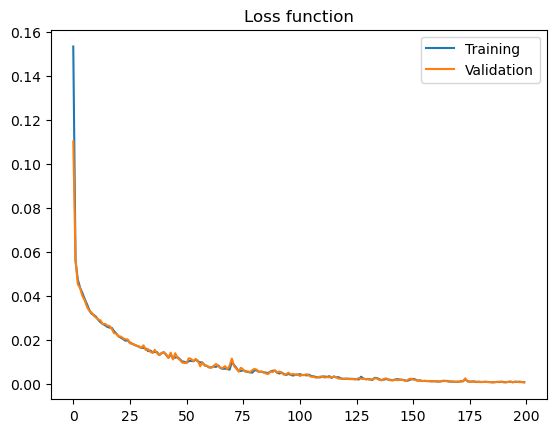

In [18]:
plt.plot(avg_train_loss, label='Training')
plt.plot(avg_val_loss, label='Validation')
plt.title('Loss function')
plt.legend()
plt.show()

3/3 [==============================] - 0s 1ms/step
Train Root Mean Squared Error: 0.024943917156402706
Train Mean Absolute Error: 0.017956585530874366
Train R2: 0.9860084625000977


Test Root Mean Squared Error: 0.04181901405048657
Test Mean Absolute Error: 0.15828087066434576
Test R2: 0.16896585265174557




C:\Users\afs\AppData\Local\Temp\ipykernel_26460\3623938304.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
C:\Users\afs\AppData\Local\Temp\ipykernel_26460\3623938304.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)


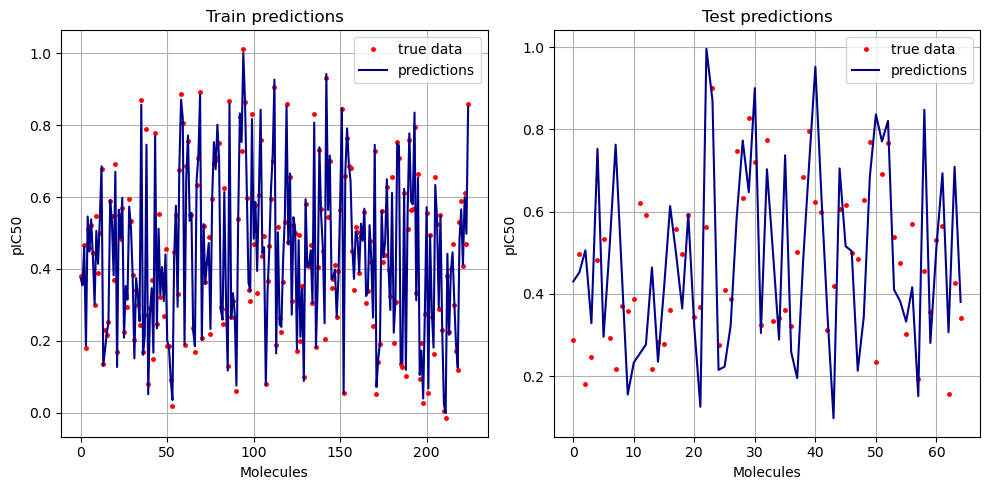

In [19]:
pred_Y_train_dnn_ard = DNN_ARD.predict(train_X)
pred_Y_test_dnn_ard = DNN_ARD.predict(test_X)
evaluate(train_Y, pred_Y_train_dnn_ard, test_Y, pred_Y_test_dnn_ard)
visualizeTrainTest(train_Y, pred_Y_train_dnn_ard, test_Y, pred_Y_test_dnn_ard)